In [770]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
from sklearn.linear_model import LinearRegression

In [771]:
# Read the sales data

df_product = pd.read_csv("./Resources/PROD_final.csv")
df_sales = pd.read_csv("./Resources/SALES_final2.csv")

# Display sample data
df_product.head()

,Part_No,Description,Category,Vendor No,Available,On Hand,Current Cost,Volume (inch^3),Length (UDF),Width (UDF),Height (UDF),Weight (UDF),Product Code,Pallet Quantity (Incoming Max) (UDF),Pallet Length (inches) (UDF),Pallet Width (inches) (UDF)
0,111MedPol009R,Med. Pile Polycarbonate 9Mat 40x40,Polycarbonate Chair Mat,MANU123,0,0,39.59700,840.5,41.0,41.0,0.5,6.0,MATS,100,62,50
1,111MedPol9RBL,Med.Pile Poly 9Mat 40x40 Blue,Polycarbonate Chair Mat,MANU123,13,13,36.68120,840.5,41.0,41.0,0.5,6.0,MATS,100,62,50
2,111MedPol09RC,Med.Pile Poly 9Mat 40x40 Cerise,Polycarbonate Chair Mat,MANU123,0,0,38.62101,840.5,41.0,41.0,0.5,6.0,MATS,100,62,50
3,111MedPol23LR,Med. Pile Polycarbonate 48x53 w/lip,Polycarbonate Chair Mat,MANU123,3,3,51.41580,1347.5,47.0,12.0,12.0,11.0,MATS,100,62,48
4,111AllPol23ER,All Carpet Polycarbonate 60'x60',Polycarbonate Chair Mat,MANU123,2,2,88.64100,14400.0,60.0,14.0,14.0,17.0,MATS,15,62,50


In [772]:
df_sales = df_sales[df_sales['Invoice Date'].notna()]

In [773]:

df_sales.head()

,Unit Price,Invoice Date,Order Qty,Ship Qty,B/O,Extended price,U/M,Margin % (Current),Currency,Product Code,Part_No,PO No,Customer No,Invoice No
0,33.95,43102.0,1,1,0,33.95,EA,38,NaN,MATS,123HarPVC20LV,CA100436839,WAYFAR,301833
1,101.90,43104.0,1,1,0,101.90,EA,58,NaN,MATS,FPRPreEnt72CH,64242622,STAPLESDS,302672
2,50.20,43109.0,2,2,0,100.40,EA,58,NaN,MATS,FCOCoAnt36BK,64286923,STAPLESDS,302946
3,130.00,43111.0,2,2,0,260.00,EA,45,NaN,MATS,111AllPol23ER,177671,G&THOO,302517
4,84.70,43111.0,4,4,0,338.80,EA,41,NaN,MATS,111MedPol23ER,64322719,STAPLES,302514


In [774]:
df_sales.shape

(67288, 14)

In [775]:
df_sales['Invoice Date']=df_sales['Invoice Date'].astype(int)
df_sales['Invoice Date'].dtype

dtype('int32')

In [776]:
df_sales['Invoice Date']=df_sales['Invoice Date'].astype(int)

for i in range(0, len(df_sales['Invoice Date'])):
   df_sales['Invoice Date'][i] = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + df_sales['Invoice Date'][i] - 2)

In [777]:
df_sales.head()

,Unit Price,Invoice Date,Order Qty,Ship Qty,B/O,Extended price,U/M,Margin % (Current),Currency,Product Code,Part_No,PO No,Customer No,Invoice No
0,33.95,2018-01-02 00:00:00,1,1,0,33.95,EA,38,NaN,MATS,123HarPVC20LV,CA100436839,WAYFAR,301833
1,101.90,2018-01-04 00:00:00,1,1,0,101.90,EA,58,NaN,MATS,FPRPreEnt72CH,64242622,STAPLESDS,302672
2,50.20,2018-01-09 00:00:00,2,2,0,100.40,EA,58,NaN,MATS,FCOCoAnt36BK,64286923,STAPLESDS,302946
3,130.00,2018-01-11 00:00:00,2,2,0,260.00,EA,45,NaN,MATS,111AllPol23ER,177671,G&THOO,302517
4,84.70,2018-01-11 00:00:00,4,4,0,338.80,EA,41,NaN,MATS,111MedPol23ER,64322719,STAPLES,302514


In [778]:
df_sales['Part_No'].value_counts()

121HarPVC20EV     8457
129HarPVC20LV     6949
119LowPVC25LV     4994
123HarPVC20LV     3176
FCVLaSte836A      2190
                  ... 
129HarPol19SR        2
1218HarPol19ER       1
FBDDesDes36RA        1
FPDAnDes84RA         1
FPDAnDes924V         1
Name: Part_No, Length: 157, dtype: int64

In [779]:
sales=df_sales[['Invoice Date', 'Ship Qty', 'Part_No']]
sales.head()

,Invoice Date,Ship Qty,Part_No
0,2018-01-02 00:00:00,1,123HarPVC20LV
1,2018-01-04 00:00:00,1,FPRPreEnt72CH
2,2018-01-09 00:00:00,2,FCOCoAnt36BK
3,2018-01-11 00:00:00,2,111AllPol23ER
4,2018-01-11 00:00:00,4,111MedPol23ER


In [780]:
sales.dtypes

Invoice Date    object
Ship Qty         int64
Part_No         object
dtype: object

In [781]:
products=df_product[['Category', 'Part_No']]
products.head()

,Category,Part_No
0,Polycarbonate Chair Mat,111MedPol009R
1,Polycarbonate Chair Mat,111MedPol9RBL
2,Polycarbonate Chair Mat,111MedPol09RC
3,Polycarbonate Chair Mat,111MedPol23LR
4,Polycarbonate Chair Mat,111AllPol23ER


In [782]:
sales=pd.merge(sales, products)
sales.head()

,Invoice Date,Ship Qty,Part_No,Category
0,2018-01-02 00:00:00,1,123HarPVC20LV,PVC Chair Mat
1,2018-01-19 00:00:00,1,123HarPVC20LV,PVC Chair Mat
2,2018-01-19 00:00:00,1,123HarPVC20LV,PVC Chair Mat
3,2018-01-22 00:00:00,1,123HarPVC20LV,PVC Chair Mat
4,2018-01-22 00:00:00,1,123HarPVC20LV,PVC Chair Mat


In [783]:
sales['Date']=pd.to_datetime(sales['Invoice Date'])
sales.dtypes

Invoice Date            object
Ship Qty                 int64
Part_No                 object
Category                object
Date            datetime64[ns]
dtype: object

In [784]:
#import datetime as dt
sales['year'] = sales['Date'].dt.year
sales['month'] = sales['Date'].dt.month
sales['day'] = sales['Date'].dt.day
sales.head()

,Invoice Date,Ship Qty,Part_No,Category,Date,year,month,day
0,2018-01-02 00:00:00,1,123HarPVC20LV,PVC Chair Mat,2018-01-02,2018,1,2
1,2018-01-19 00:00:00,1,123HarPVC20LV,PVC Chair Mat,2018-01-19,2018,1,19
2,2018-01-19 00:00:00,1,123HarPVC20LV,PVC Chair Mat,2018-01-19,2018,1,19
3,2018-01-22 00:00:00,1,123HarPVC20LV,PVC Chair Mat,2018-01-22,2018,1,22
4,2018-01-22 00:00:00,1,123HarPVC20LV,PVC Chair Mat,2018-01-22,2018,1,22


In [785]:
sales.dtypes

Invoice Date            object
Ship Qty                 int64
Part_No                 object
Category                object
Date            datetime64[ns]
year                     int64
month                    int64
day                      int64
dtype: object

In [786]:
sales.shape

(64218, 8)

In [787]:
sales.rename(columns = {'Ship Qty':'Ship Quantity'}, inplace = True)
sales['Category'].value_counts()

PVC Chair Mat                31150
Polycarbonate Chair Mat       8987
Recycled Chair Mat            5544
Anti-Fatigue Mat              5228
Desk Pad                      4267
Steel Whiteboard              4178
Porcelain Whiteboard          2248
Entrance Mat                  1412
Tempered Glass Chair Mat       678
Tempered Glass Whiteboard      526
Name: Category, dtype: int64

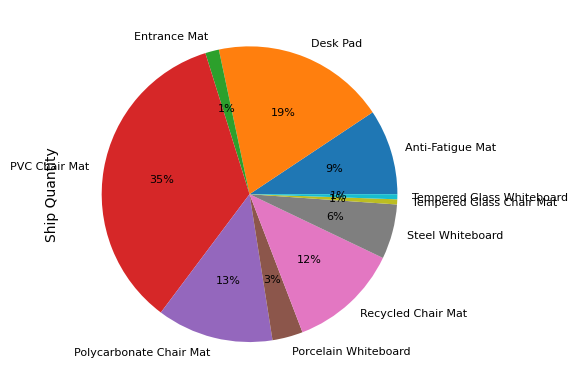

In [788]:
sales.groupby(['Category']).sum().plot(kind='pie', y='Ship Quantity', autopct='%1.0f%%', legend=False, fontsize=8)
plt.show()

In [789]:
product_1=sales.loc[(sales['Category']=='Anti-Fatigue Mat')]

product_1.head()


,Invoice Date,Ship Quantity,Part_No,Category,Date,year,month,day
3263,2018-01-09 00:00:00,2,FCOCoAnt36BK,Anti-Fatigue Mat,2018-01-09,2018,1,9
3264,2018-01-12 00:00:00,2,FCOCoAnt36BK,Anti-Fatigue Mat,2018-01-12,2018,1,12
3265,2018-01-17 00:00:00,1,FCOCoAnt36BK,Anti-Fatigue Mat,2018-01-17,2018,1,17
3266,2018-01-17 00:00:00,2,FCOCoAnt36BK,Anti-Fatigue Mat,2018-01-17,2018,1,17
3267,2018-01-17 00:00:00,2,FCOCoAnt36BK,Anti-Fatigue Mat,2018-01-17,2018,1,17


In [790]:
pro_1=product_1.groupby(pd.to_datetime(product_1['Date']).dt.strftime('%y-%m'))['Ship Quantity'].sum()
pro_1[:10]

Date
18-01    149
18-02    315
18-03    293
18-04    185
18-05    234
18-06    257
18-07    321
18-08    246
18-09    203
18-10    311
Name: Ship Quantity, dtype: int64

In [791]:
pro_1=pd.DataFrame(pro_1)
pro_1.head()

,Ship Quantity
Date,
18-01,149
18-02,315
18-03,293
18-04,185
18-05,234


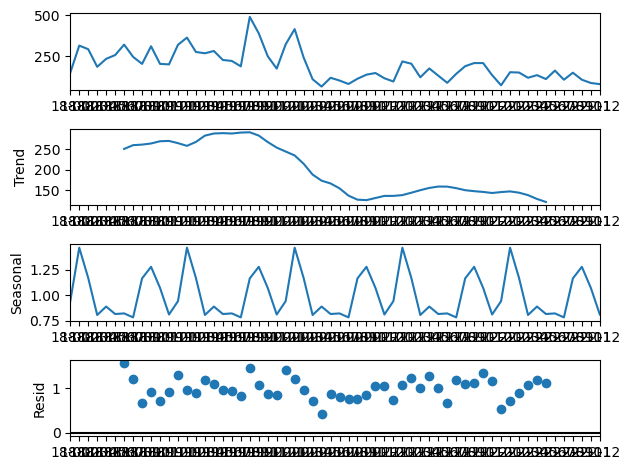

In [792]:
# import of the function seasonal_decompose из statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
 
res=seasonal_decompose(pro_1, model='multiplicable', period=12)

res.plot()
plt.show()

In [793]:
#product_1=product_1[['year', 'month', 'Ship Quantity']]
#product_1.head()

In [794]:
product_1=product_1.groupby(['year', 'month'])[['Ship Quantity']].sum()
product_1['3 Moving Averages'] = product_1['Ship Quantity'].rolling(window=3).mean()
product_1.head()

Ship Quantity  3 Moving Averages
year month                                  
2018 1                149                NaN
     2                315                NaN
     3                293         252.333333
     4                185         264.333333
     5                234         237.333333

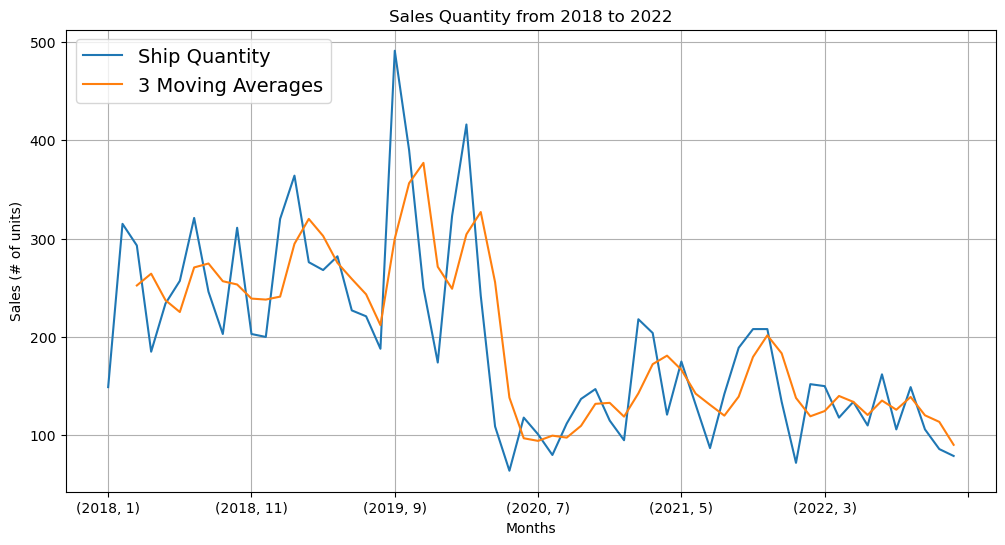

In [795]:
#fig, axs = plt.subplots()
pr_1 = product_1.plot(figsize=(12, 6), grid=True)
pr_1.set(title = 'Sales Quantity from 2018 to 2022', xlabel = 'Months', ylabel = 'Sales (# of units)')
plt.legend(title = '', loc = 'upper left', fontsize = 14)

plt.show()

<Axes: xlabel='year,month'>

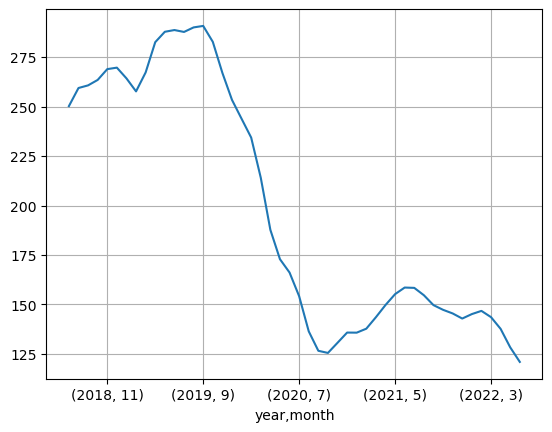

In [796]:
# import of the function seasonal_decompose из statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
 
result=seasonal_decompose(product_1['Ship Quantity'], model='multiplicable', period=12)
result.trend.plot(grid=True)


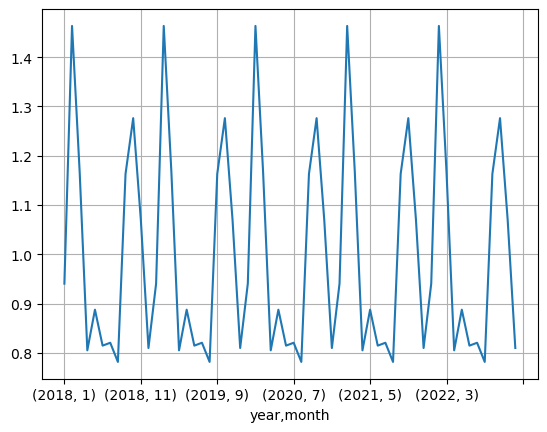

In [797]:
result.seasonal.plot(grid=True)



plt.show()

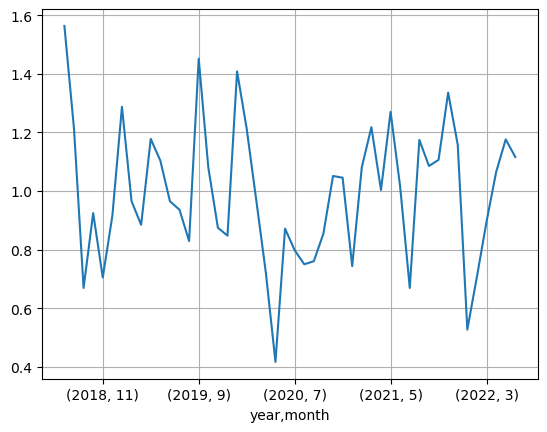

In [798]:
result.resid.plot(grid=True)
plt.show()

Dickey-Fuller test:
H_0: The time series are not stationary (p_value >= 0.05)
H_1: Reject H_0 (p_value < 0.05)

In [799]:
# import files for Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
 
# adf_test
adf_test = adfuller(product_1['Ship Quantity'])
 
# p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.625604753763636


In [800]:
# обучающая выборка будет включать данные до декабря 1959 года включительно
train = pro_1[:'22']
 
# тестовая выборка начнется с января 1960 года (по сути, один год)
test = pro_1['22':]
test

,Ship Quantity
Date,
22-01,72
22-02,152
22-03,150
22-04,118
22-05,134
22-06,110
22-07,162
22-08,106
22-09,149


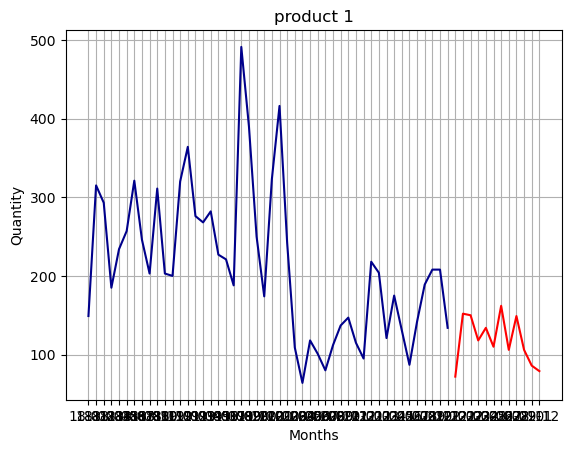

In [801]:
plt.plot(train, color = "darkblue")
plt.plot(test, color = "red")
 
plt.title('product 1')
plt.ylabel('Quantity')
plt.xlabel('Months')
plt.grid()
 
plt.show()

In [802]:
import warnings                                  # do not disturbe mode
warnings.filterwarnings('ignore')

# Load packages
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

# Importing everything from forecasting quality metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error


In [803]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()


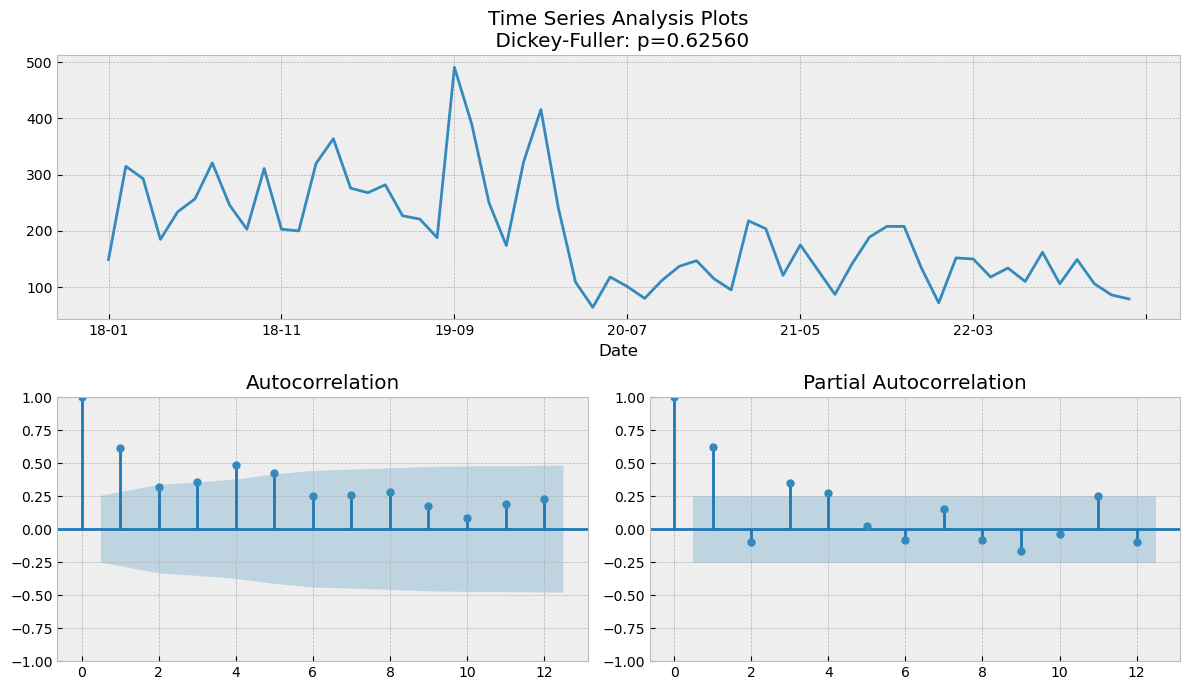

In [804]:
tsplot(pro_1['Ship Quantity'], lags=12)

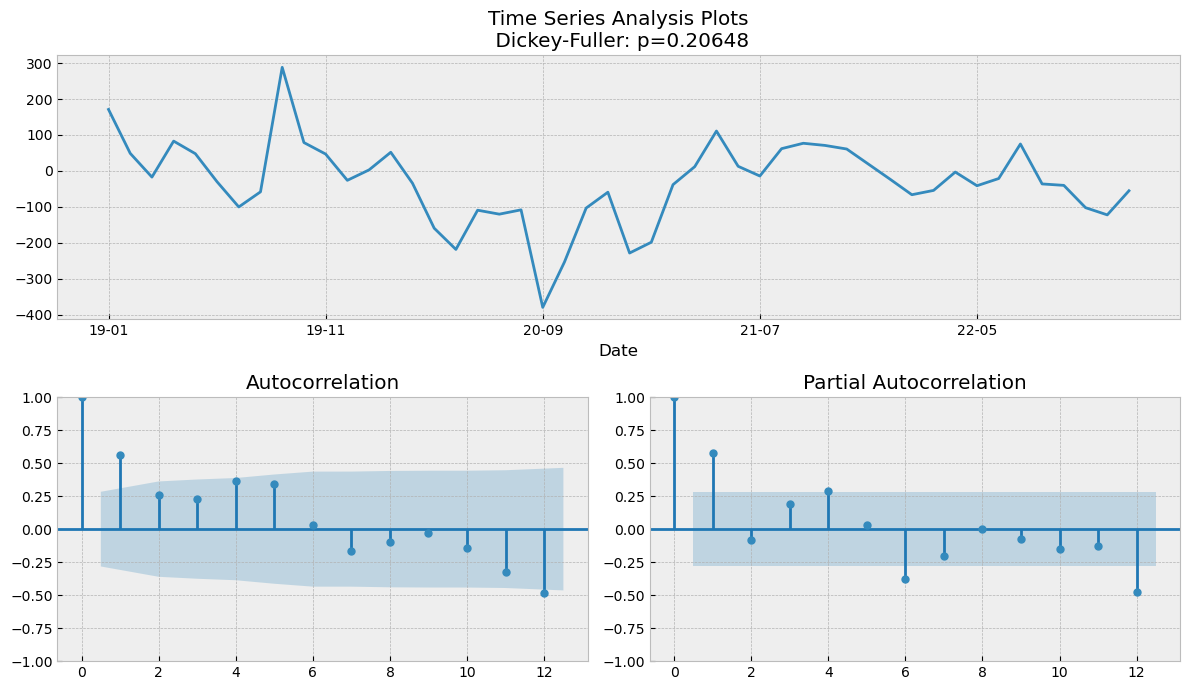

In [805]:
# The seasonal difference
pro_diff = pro_1['Ship Quantity'] - pro_1['Ship Quantity'].shift(12)
tsplot(pro_diff[12:], lags=12)


In [806]:
# setting initial values and some bounds for them
ps = range(1, 4)
d=1 
qs = range(1, 4)
Ps = range(0, 3)
D=1 
Qs = range(0, 2)
s = 12 # season length is still 12

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)  # 36


54

In [807]:
print(parameters_list)

[(1, 1, 0, 0), (1, 1, 0, 1), (1, 1, 1, 0), (1, 1, 1, 1), (1, 1, 2, 0), (1, 1, 2, 1), (1, 2, 0, 0), (1, 2, 0, 1), (1, 2, 1, 0), (1, 2, 1, 1), (1, 2, 2, 0), (1, 2, 2, 1), (1, 3, 0, 0), (1, 3, 0, 1), (1, 3, 1, 0), (1, 3, 1, 1), (1, 3, 2, 0), (1, 3, 2, 1), (2, 1, 0, 0), (2, 1, 0, 1), (2, 1, 1, 0), (2, 1, 1, 1), (2, 1, 2, 0), (2, 1, 2, 1), (2, 2, 0, 0), (2, 2, 0, 1), (2, 2, 1, 0), (2, 2, 1, 1), (2, 2, 2, 0), (2, 2, 2, 1), (2, 3, 0, 0), (2, 3, 0, 1), (2, 3, 1, 0), (2, 3, 1, 1), (2, 3, 2, 0), (2, 3, 2, 1), (3, 1, 0, 0), (3, 1, 0, 1), (3, 1, 1, 0), (3, 1, 1, 1), (3, 1, 2, 0), (3, 1, 2, 1), (3, 2, 0, 0), (3, 2, 0, 1), (3, 2, 1, 0), (3, 2, 1, 1), (3, 2, 2, 0), (3, 2, 2, 1), (3, 3, 0, 0), (3, 3, 0, 1), (3, 3, 1, 0), (3, 3, 1, 1), (3, 3, 2, 0), (3, 3, 2, 1)]


In [808]:
def optimizeSARIMA(parameters_list, d, D, s):
    """Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(pro_1['Ship Quantity'], order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table


In [809]:
warnings.filterwarnings("ignore") 
result_table = optimizeSARIMA(parameters_list, d, D, s)
result_table.head()

  0%|          | 0/54 [00:00<?, ?it/s]

,parameters,aic
0,"(2, 1, 0, 1)",549.438391
1,"(2, 1, 2, 1)",550.284602
2,"(1, 2, 0, 1)",550.646610
3,"(2, 1, 1, 1)",550.743738
4,"(1, 1, 0, 1)",550.845554


In [810]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(pro_1, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Ship Quantity   No. Observations:                   60
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -269.719
Date:                            Wed, 07 Jun 2023   AIC                            549.438
Time:                                    20:25:42   BIC                            558.689
Sample:                                         0   HQIC                           552.920
                                             - 60                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2049      0.275      0.745      0.456      -0.334       0.744
ar.L2         -0.3426      0.222   

In [811]:
def plotSARIMA(series, model, n_steps):
    """Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future    
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['sarima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['sarima_model'][:s] = np.NaN
    
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.sarima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['sarima_model'][s+d:])
    forecast = np.atleast_1d(np.array(forecast, dtype=object))

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label='model')
    #plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label='actual')
    plt.legend()
    plt.grid(True)


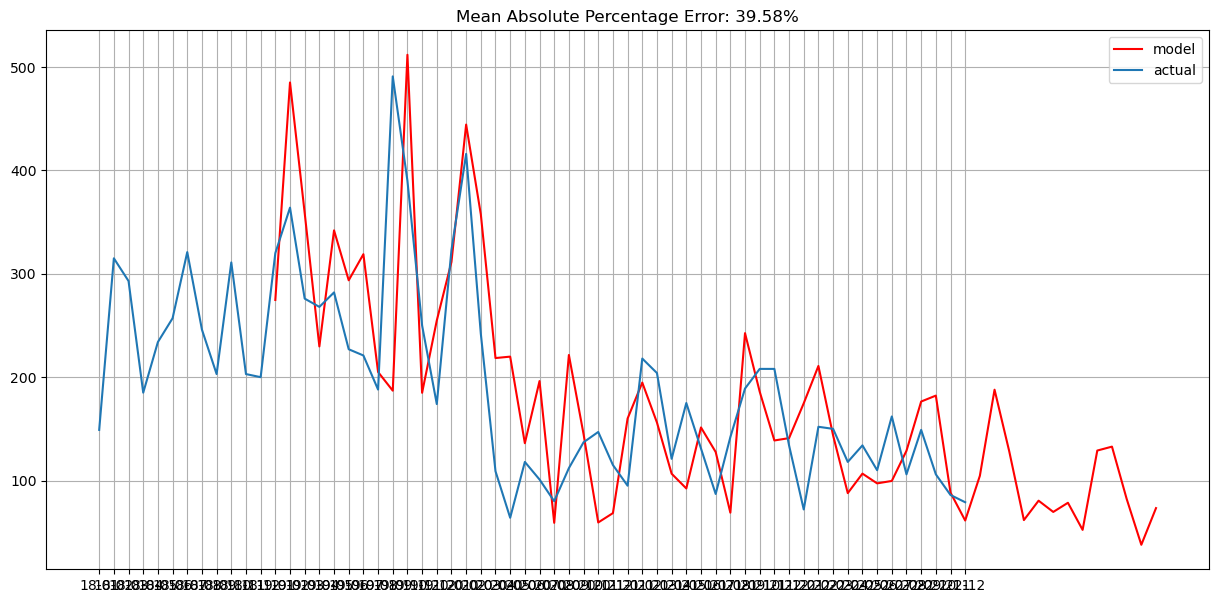

In [812]:
#p, q, P, Q = result_table.parameters[0]

#best_model=sm.tsa.statespace.SARIMAX(pro_1, order=(p, d, q), 
                                       #seasonal_order=(P, D, Q, s)).fit(disp=-1)

#pro_1=pro_1['Ship Quantity'].astype(str)

plotSARIMA(pro_1, best_model, 12)
